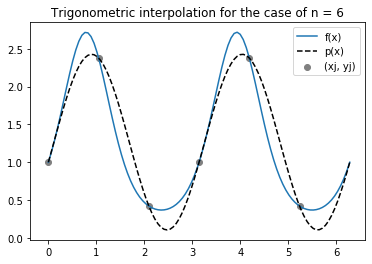

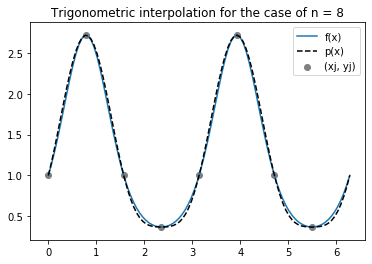

In [6]:
import numpy as np

def f(x):
    return np.exp(np.sin(2*x))

def generatedata(n,f):
    dataxs = 2*np.pi*np.arange(n)/n
    datays = f(dataxs)
    return dataxs, datays

def computeparams(dataxs,datays):
    n = dataxs.size
    m = n//2
    aparams = np.zeros(m+1)
    bparams = np.zeros(m-1)
    
    for k in range(m+1):
        aparams[k] = datays@np.cos(k*dataxs)/m
    for k in range(1,m):
        bparams[k-1] = datays@np.sin(k*dataxs)/m
    return aparams, bparams

def triginterp(aparams,bparams,x):
    n = aparams.size + bparams.size
    m = n//2
    val = 0.5*(aparams[0] + aparams[-1]*np.cos(m*x))
    for k in range(1,m):
        val += aparams[k]*np.cos(k*x)
        val += bparams[k-1]*np.sin(k*x)
    return val

# Plot the interpolation and the original function
def plot_interpolation(n):
    dataxs, datays = generatedata(n, f)
    aparams, bparams = computeparams(dataxs, datays)
    xvals = np.linspace(0, 2 * np.pi, 100)
    yinterp = np.array([triginterp(aparams, bparams, x) for x in xvals])
    
    plt.figure()
    plt.plot(xvals, f(xvals), label='f(x)')
    plt.scatter(dataxs, datays, color='gray', label='(xj, yj)')
    plt.plot(xvals, yinterp, 'k--', label='p(x)')
    plt.title('Trigonometric interpolation for the case of n = {}'.format(n))
    plt.legend()
    plt.show()

if __name__ == '__main__':
    # Execute the plotting function for n = 6 and n = 8
    plot_interpolation(6)
    plot_interpolation(8)

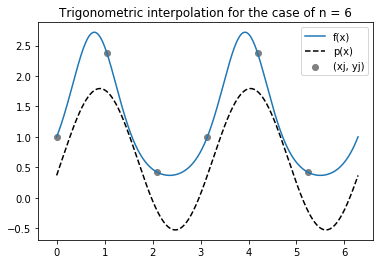

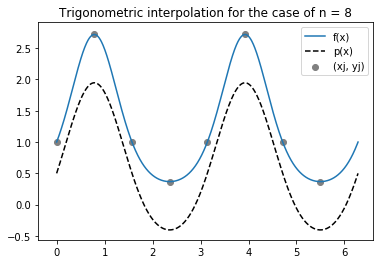

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to interpolate
def f(x):
    return np.exp(np.sin(2*x))

# Generate data points
def generatedata(n, f):
    dataxs = 2 * np.pi * np.arange(n) / n
    datays = f(dataxs)
    return dataxs, datays

# Compute the interpolation parameters
def computeparams(dataxs, datays):
    n = dataxs.size
    m = n // 2
    aparams = np.zeros(m+1)
    bparams = np.zeros(m+1)  # Adjusted to include m terms
    
    # Calculate the coefficients a_k and b_k
    aparams[0] = np.sum(datays) * (1/n)
    aparams[1:m] = 2 * np.dot(np.cos(np.outer(np.arange(1, m), dataxs)), datays) / n
    bparams[1:m] = 2 * np.dot(np.sin(np.outer(np.arange(1, m), dataxs)), datays) / n
    if n % 2 == 0:  # Adjust for even n values
        aparams[m] = np.sum(datays * np.cos(np.pi * np.arange(n))) * (1/n)
    
    return aparams, bparams

# Trigonometric interpolation function
def triginterp(aparams, bparams, x, n):
    m = len(aparams) - 1
    val = aparams[0] / 2
    val += np.sum([aparams[k] * np.cos(k * x) + bparams[k] * np.sin(k * x) for k in range(1, m)])
    if n % 2 == 0:  # Add the last term for even n
        val += aparams[m] * np.cos(m * x) / 2
    return val

# Plot the interpolation and the original function
def plot_interpolation(n):
    dataxs, datays = generatedata(n, f)
    aparams, bparams = computeparams(dataxs, datays)
    xvals = np.linspace(0, 2 * np.pi, 1000)
    yinterp = np.array([triginterp(aparams, bparams, x, n) for x in xvals])
    
    plt.figure()
    plt.plot(xvals, f(xvals), label='f(x)')
    plt.scatter(dataxs, datays, color='gray', label='(xj, yj)')
    plt.plot(xvals, yinterp, 'k--', label='p(x)')
    plt.title('Trigonometric interpolation for the case of n = {}'.format(n))
    plt.legend()
    plt.show()

# Execute the plotting function for n = 6 and n = 8
plot_interpolation(6)
plot_interpolation(8)

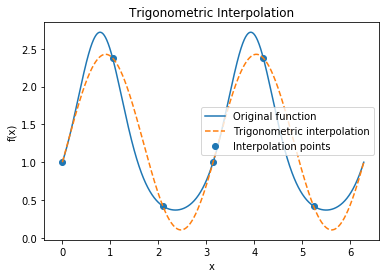

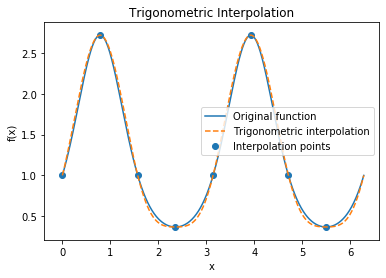

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to interpolate
def f(x):
    return np.exp(np.sin(2 * x))

# Generate data points
def generatedata(n, f):
    dataxs = 2 * np.pi * np.arange(n) / n
    datays = f(dataxs)
    return dataxs, datays

# Compute the Fourier coefficients
def computeparams(dataxs, datays):
    n = len(dataxs)
    aparams = np.zeros(n // 2 + 1)
    bparams = np.zeros(n // 2 + 1)
    
    for k in range(n // 2 + 1):
        aparams[k] = np.sum(datays * np.cos(k * dataxs)) * 2 / n
        bparams[k] = np.sum(datays * np.sin(k * dataxs)) * 2 / n
    # Adjust the a0 and am coefficients
    aparams[0] /= 2
    aparams[-1] /= 2
    
    return aparams, bparams

# Define the trigonometric interpolation function
def triginterp(aparams, bparams, x, n):
    m = n // 2
    val = aparams[0] + aparams[-1] * np.cos(m * x)
    for k in range(1, m):
        val += aparams[k] * np.cos(k * x) + bparams[k] * np.sin(k * x)
    return val

# Plotting function
def plot_triginterp(n, f):
    # Generate data points
    dataxs, datays = generatedata(n, f)
    aparams, bparams = computeparams(dataxs, datays)
    
    # Plot the original function
    x_dense = np.linspace(0, 2 * np.pi, 1000)
    plt.plot(x_dense, f(x_dense), label='Original function')

    # Plot the interpolation points
    plt.scatter(dataxs, datays, label='Interpolation points')

    # Plot the trigonometric interpolation
    y_interp = [triginterp(aparams, bparams, x, n) for x in x_dense]
    plt.plot(x_dense, y_interp, label='Trigonometric interpolation', linestyle='--')

    # Formatting the plot
    plt.title('Trigonometric Interpolation')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

# Perform the plotting for n=6 and n=8
plot_triginterp(6, f)
plot_triginterp(8, f)


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1.0          # Length of the string
c = 1.0          # Wave speed
dx = L / 100     # Spatial step size
dt = 0.01        # Time step size
r = (c * dt / dx)**2  # CFL condition constant

# Initialization
x = np.arange(0, L + dx, dx)
t_max = 2.0
timesteps = int(t_max / dt)
y_prev = np.zeros_like(x)  # y at time step j-1
y = np.zeros_like(x)       # y at time step j
y_next = np.zeros_like(x)  # y at time step j+1

# Initial conditions
y = f(x)
y_prev = y - g(x) * dt  # Approximating y at time step -1 using initial velocity

# Apply boundary conditions
y[0] = y[-1] = 0
y_prev[0] = y_prev[-1] = 0

# Time stepping
for t in range(1, timesteps):
    for i in range(1, len(x) - 1):
        y_next[i] = r * (y[i + 1] + y[i - 1]) + 2 * (1 - r) * y[i] - y_prev[i]
    
    y_next[0] = y_next[-1] = 0  # Boundary conditions
    y_prev, y = y, y_next
    y_next = np.zeros_like(x)  # Reset y_next for the next iteration

    # Plotting at certain time steps
    if t % 50 == 0:
        plt.plot(x, y, label=f't={t*dt:.2f}s')

plt.title('Vibrating String Over Time')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


NameError: name 'g' is not defined